In [1]:
from ca_v1 import CA
import numpy as np
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [73]:
rule=90
updt=5
grid=15
N_data=10000
DATA=np.zeros((N_data,grid))
RESULTS=np.zeros((N_data,grid))
for i in range(N_data):
    C_A=CA(grid,rule,0,BC=1)
    IA,FM=C_A.evo(updt)
    DATA[i,:]=IA
    RESULTS[i,]=FM[-1,:]
    #plt.imshow(FM,cmap='gray')
    #plt.show()


In [89]:
model = Sequential()

In [90]:
model.add(Dense(20,activation='relu',use_bias=True, input_dim=grid))

In [91]:
model.add(Dense(10,activation='relu'))


In [92]:
model.add(Dense(5,activation='relu'))


In [93]:
model.add(Dense(10,activation='relu'))


In [94]:
model.add(Dense(20,activation='relu'))

In [95]:
model.add(Dense(grid,activation='sigmoid'))

In [96]:
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_25 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
Total params: 975
Trainable params: 975
Non-trainable params: 0
________________________________________________________

In [97]:
END=int(len(DATA)*0.99)
DATA_trainning=DATA[:END,:]
RESULTS_trainning=RESULTS[:END,:]
DATA_check=DATA[END:,:]
RESULTS_check=RESULTS[END:,:]
print(np.shape(DATA_check))

(10, 10)


In [ ]:
model.fit(DATA_trainning,RESULTS_trainning, epochs=900, batch_size=10)

Epoch 1/900
990/990 [==============================] - 1s 736us/step - loss: 0.6922 - accuracy: 0.5011
Epoch 2/900
990/990 [==============================] - 0s 307us/step - loss: 0.6901 - accuracy: 0.5293
Epoch 3/900
990/990 [==============================] - 0s 309us/step - loss: 0.6872 - accuracy: 0.5361
Epoch 4/900
990/990 [==============================] - 0s 318us/step - loss: 0.6826 - accuracy: 0.5460
Epoch 5/900
990/990 [==============================] - 0s 309us/step - loss: 0.6769 - accuracy: 0.5493
Epoch 6/900
990/990 [==============================] - 0s 311us/step - loss: 0.6707 - accuracy: 0.5645
Epoch 7/900
990/990 [==============================] - 0s 320us/step - loss: 0.6639 - accuracy: 0.5736
Epoch 8/900
990/990 [==============================] - 0s 311us/step - loss: 0.6560 - accuracy: 0.5794
Epoch 9/900
990/990 [==============================] - 0s 331us/step - loss: 0.6478 - accuracy: 0.5864
Epoch 10/900
990/990 [==============================] - 0s 325us/step - l

990/990 [==============================] - 0s 426us/step - loss: 0.3357 - accuracy: 0.8182
Epoch 80/900
990/990 [==============================] - 0s 364us/step - loss: 0.3331 - accuracy: 0.8181
Epoch 81/900
990/990 [==============================] - 0s 362us/step - loss: 0.3306 - accuracy: 0.8212
Epoch 82/900
990/990 [==============================] - 0s 348us/step - loss: 0.3288 - accuracy: 0.8215
Epoch 83/900
990/990 [==============================] - 0s 373us/step - loss: 0.3262 - accuracy: 0.8249
Epoch 84/900
990/990 [==============================] - 0s 363us/step - loss: 0.3235 - accuracy: 0.8269
Epoch 85/900
990/990 [==============================] - 0s 370us/step - loss: 0.3225 - accuracy: 0.8295
Epoch 86/900
990/990 [==============================] - 0s 344us/step - loss: 0.3200 - accuracy: 0.8287
Epoch 87/900
990/990 [==============================] - 0s 338us/step - loss: 0.3174 - accuracy: 0.8291
Epoch 88/900
990/990 [==============================] - 0s 342us/step - loss:

990/990 [==============================] - 0s 306us/step - loss: 0.2334 - accuracy: 0.8790
Epoch 158/900
990/990 [==============================] - 0s 408us/step - loss: 0.2331 - accuracy: 0.8791
Epoch 159/900
990/990 [==============================] - 0s 329us/step - loss: 0.2298 - accuracy: 0.8783
Epoch 160/900
990/990 [==============================] - 0s 299us/step - loss: 0.2280 - accuracy: 0.8772
Epoch 161/900
990/990 [==============================] - 0s 324us/step - loss: 0.2273 - accuracy: 0.8814
Epoch 162/900
990/990 [==============================] - 0s 323us/step - loss: 0.2254 - accuracy: 0.8827
Epoch 163/900
990/990 [==============================] - 0s 315us/step - loss: 0.2251 - accuracy: 0.8823
Epoch 164/900
990/990 [==============================] - 0s 301us/step - loss: 0.2228 - accuracy: 0.8836
Epoch 165/900
990/990 [==============================] - 0s 329us/step - loss: 0.2223 - accuracy: 0.8839
Epoch 166/900
990/990 [==============================] - 0s 327us/ste

In [ ]:
RESULTS_NN=model.predict(DATA_check)#, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print(RESULTS_NN)

In [88]:
fig,axs=plt.subplots(nrows=2,ncols=grid,figsize=(200,50),dpi=100)
aux_1=np.arange(len(RESULTS_NN))

for i in range(grid):
    axs[0,i].scatter(aux_1,sorted(RESULTS_NN[:,i]))
    axs[1,i].scatter(aux_1,sorted(RESULTS_check[:,i]))
    axs[0,i].set_ylim([0,1])
    #axs[1,i].set_ylim([0,1])
plt.show()

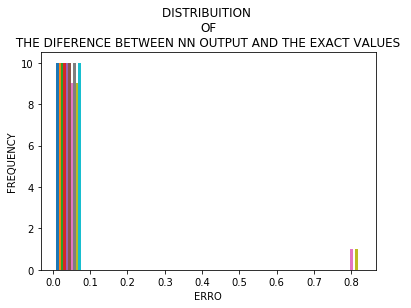

In [84]:
ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=10)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.show()

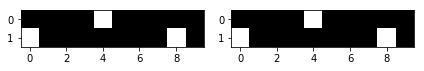

In [87]:
TEST_NN=np.zeros((updt,grid))
TEST_NN[0,int(grid/2)-1]=1
TEST_NN[-1:,:]=model.predict(TEST_NN[0:1,:])
plt.subplot(121)
plt.imshow(TEST_NN[0::updt-1,:],cmap='gray')
plt.subplot(122)
X,COMPARE=CA(grid,rule,1,BC=1).evo(updt)
plt.imshow(COMPARE[0::updt-1,:],cmap='gray')
plt.tight_layout()
plt.show()

